In [18]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read titanic data
df_train = pd.read_csv('train.csv', index_col='PassengerId')
df_test = pd.read_csv('test.csv', index_col='PassengerId')

In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [54]:
# Understanding TKT
df = df_train.copy(deep=True)
df['TKT'] = np.array([int(tkt.split()[-1]) if tkt.split()[-1].isdigit() else 0 for tkt in df.Ticket.values])
dict_TKT = df.TKT.value_counts().reset_index(name="count")

print(dict_TKT.query("count > 5"))

dict_TKT = dict(dict_TKT.to_dict(orient='split')['data'])
#print(dict_TKT)

df['TKT_count'] = [dict_TKT[tkt] for tkt in df.TKT]
df[df.TKT==2144]

     index  count
0     1601      7
1     2343      7
2   347082      7
3   347088      6
4  3101295      6
5     2144      6


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TKT,TKT_count
PassengerId,,,,,,,,,,,,,
60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S,2144,6
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S,2144,6
387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S,2144,6
481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S,2144,6
679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S,2144,6
684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S,2144,6


In [55]:
# Understanding TKT
df = df_train.copy(deep=True)
df['TKT'] = np.array([int(tkt.split()[-1]) if tkt.split()[-1].isdigit() else 0 for tkt in df.Ticket.values])
dict_TKT = df.TKT.value_counts().reset_index(name="count")

print(dict_TKT.query("count > 5"))

dict_TKT = dict(dict_TKT.to_dict(orient='split')['data'])
#print(dict_TKT)

df['TKT_count'] = [dict_TKT[tkt] for tkt in df.TKT]
df[df.TKT==2144]

     index  count
0     1601      7
1     2343      7
2   347082      7
3   347088      6
4  3101295      6
5     2144      6


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TKT,TKT_count
PassengerId,,,,,,,,,,,,,
60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S,2144,6
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S,2144,6
387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S,2144,6
481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S,2144,6
679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S,2144,6
684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S,2144,6


In [62]:
print(df.groupby('TKT').Survived.mean())
pd.pivot_table(df, values='Survived', index='TKT', columns='Sex', aggfunc='mean').dropna()

TKT
0          0.25
3          0.00
541        1.00
693        0.00
695        0.00
           ... 
3101310    0.00
3101311    0.00
3101312    0.00
3101316    0.00
3101317    0.00
Name: Survived, Length: 679, dtype: float64


Sex,female,male
TKT,,
3,0.0,0.0
2123,1.0,0.0
2144,0.0,0.0
2343,0.0,0.0
2627,0.0,0.0
...,...,...
382652,0.0,0.0
392096,1.0,1.0
3101278,1.0,0.0


In [5]:
2 in [1, 2]

True

In [6]:
sum([ x in df.TKT for x in [int(tkt.split()[-1]) if tkt.split()[-1].isdigit() else 0 for tkt in df_test.Ticket.values]])

8

In [7]:
# select females and masters (boys)
boy = (df.Name.str.contains('Master')) | ((df.Sex=='male') & (df.Age<13))
female = df.Sex=='female'
boy_or_female = boy | female

# no. females + boys on ticket
n_ticket = df[boy_or_female].groupby('Ticket').Survived.count()

# survival rate amongst females + boys on ticket
tick_surv = df[boy_or_female].groupby('Ticket').Survived.mean()

In [8]:
tick_surv

Ticket
110152         1.0
110413         1.0
110813         1.0
111361         1.0
112053         1.0
              ... 
W./C. 14258    1.0
W./C. 6607     0.0
W./C. 6608     0.0
W./C. 6609     0.0
WE/P 5735      1.0
Name: Survived, Length: 256, dtype: float64

In [58]:
print(df_train.groupby('SibSp').Survived.mean())
pd.pivot_table(df_train, values='Name', index='SibSp', columns='Survived', aggfunc='count')

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


Survived,0,1
SibSp,,
0,398.0,210.0
1,97.0,112.0
2,15.0,13.0
3,12.0,4.0
4,15.0,3.0
5,5.0,NaN
8,7.0,NaN


In [59]:
print(df_train.groupby('Parch').Survived.mean())
pd.pivot_table(df_train, values='Name', index='Parch', columns='Survived', aggfunc='count')

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


Survived,0,1
Parch,,
0,445.0,233.0
1,53.0,65.0
2,40.0,40.0
3,2.0,3.0
4,4.0,NaN
5,4.0,1.0
6,1.0,NaN


In [9]:
# function to create relevant features for test data
def create_features(frame):
    frame['Boy'] = (frame.Name.str.contains('Master')) | ((frame.Sex=='male') & (frame.Age<13))
    
    frame['Female'] = (frame.Sex=='female').astype(int)

    # if ticket exists in training data, fill NTicket with no. women+boys
    # on that ticket in the training data.
    frame['NTicket'] = frame.Ticket.replace(n_ticket)
    # otherwise NTicket=0
    frame.loc[~frame.Ticket.isin(n_ticket.index),'NTicket']=0

    # if ticket exists in training data, fill TicketSurv with
    # women+boys survival rate in training data  
    frame['TicketSurv'] = frame.Ticket.replace(tick_surv)
    # otherwise TicketSurv=0
    frame.loc[~frame.Ticket.isin(tick_surv.index),'TicketSurv']=0

    # return data frame only including features needed for prediction
    return frame[['Female','Boy','NTicket','TicketSurv']]

In [10]:
print(df_train.Ticket)
print(n_ticket)
df_train.Ticket.replace(n_ticket)

PassengerId
1             A/5 21171
2              PC 17599
3      STON/O2. 3101282
4                113803
5                373450
             ...       
887              211536
888              112053
889          W./C. 6607
890              111369
891              370376
Name: Ticket, Length: 891, dtype: object
Ticket
110152         3
110413         2
110813         1
111361         2
112053         1
              ..
W./C. 14258    1
W./C. 6607     1
W./C. 6608     3
W./C. 6609     1
WE/P 5735      1
Name: Survived, Length: 256, dtype: int64


PassengerId
1      A/5 21171
2              1
3              1
4              1
5         373450
         ...    
887       211536
888            1
889            1
890       111369
891       370376
Name: Ticket, Length: 891, dtype: object

In [11]:
# predict survival for a passenger
def did_survive(row):
    if row.Female:
        # predict died if all women+boys on ticket died
        if (row.NTicket>0) and (row.TicketSurv==0):
            return 0
        # predict survived for all other women
        else:
            return 1
        
    elif row.Boy:
        # predict survived if all women+boys on ticket survived
        if (row.NTicket>0) and (row.TicketSurv==1):
            return 1
        # predict died for all other boys
        else:
            return 0
        
    else:
        # predict all men die
        return 0

In [12]:
# extract the features to use
X = create_features(df_test)
X

,Female,Boy,NTicket,TicketSurv
PassengerId,,,,
892,0,False,0,0
893,1,False,0,0
894,0,False,0,0
895,0,False,0,0
896,1,False,1,1.0
...,...,...,...,...
1305,0,False,0,0
1306,1,False,1,1.0
1307,0,False,0,0


In [13]:
# predict test data
pred = X.apply(did_survive,axis=1)
pred

PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    1
Length: 418, dtype: int64

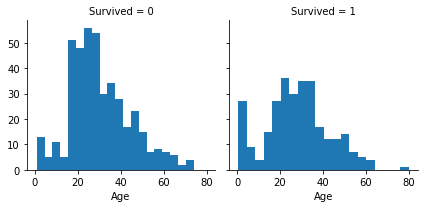

In [47]:
# Source: https://www.kaggle.com/startupsci/titanic-data-science-solutions
# Correlating numerical features
g = sns.FacetGrid(df_train, col='Survived')
_ = g.map(plt.hist, 'Age', bins=20)

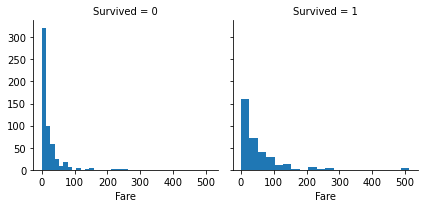

In [21]:
# Correlating numerical and ordinal features
g = sns.FacetGrid(df_train, col='Survived')
_ = g.map(plt.hist, 'Fare', bins=20)

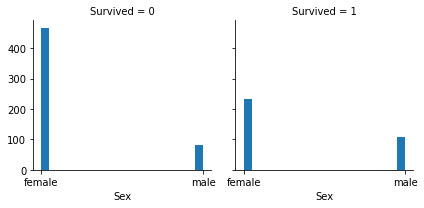

In [22]:
g = sns.FacetGrid(df_train, col='Survived')
_ = g.map(plt.hist, 'Sex', bins=20)

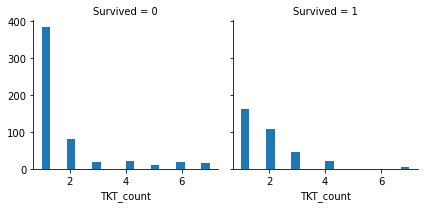

In [24]:
g = sns.FacetGrid(df, col='Survived')
_ = g.map(plt.hist, 'TKT_count', bins=20)

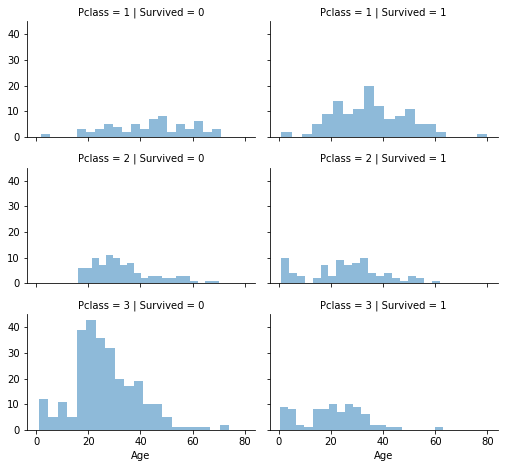

In [29]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
_ = grid.map(plt.hist, 'Age', alpha=.5, bins=20)
_ = grid.add_legend()

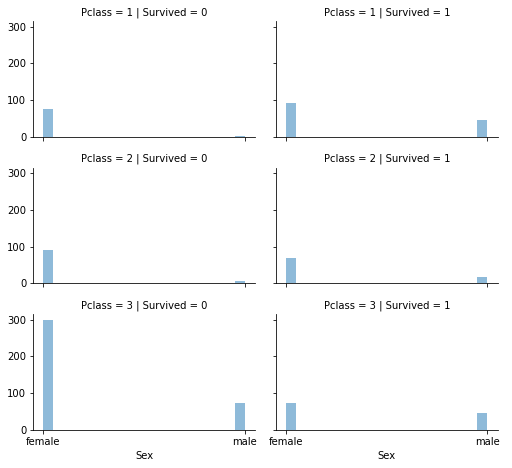

In [30]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
_ = grid.map(plt.hist, 'Sex', alpha=.5, bins=20)
_ = grid.add_legend()

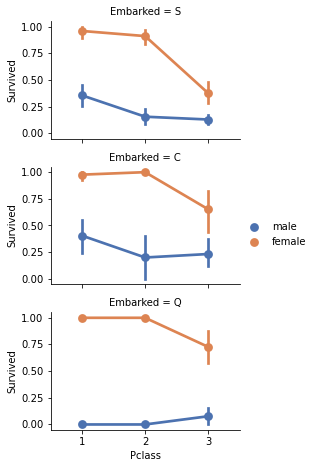

In [45]:
# Correlating categorical features
grid = sns.FacetGrid(df_train, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep',  hue_order=['male', 'female'], order=[1, 2, 3])
_ = grid.add_legend()

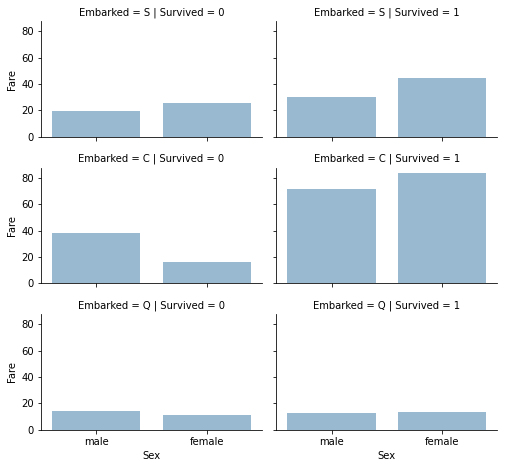

In [51]:
# Correlating categorical and numerical features
grid = sns.FacetGrid(df_train, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None, order=['male', 'female'])
_ = grid.add_legend()